In [ ]:
#James Godkin

In [116]:
import zipfile
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [117]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip

mkdir: cannot create directory ‘dataroot’: File exists
--2021-07-13 20:11:26--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074743 (31M) [application/zip]
Saving to: ‘dataroot/data_1.zip.5’

data_1.zip.5        100%[===================>]  30.59M  65.7MB/s    in 0.5s    

2021-07-13 20:11:27 (65.7 MB/s) - ‘dataroot/data_1.zip.5’ saved [32074743/32074743]

--2021-07-13 20:11:27--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to 

In [118]:
# Unzip
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [119]:
# Load sign names
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [120]:
# Load images
signimages = pickle.load(open(dataroot+"train.p", "rb"))

The image shows a Turn left ahead sign


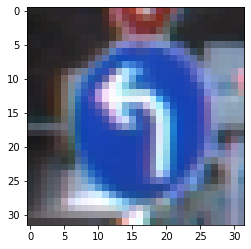

In [121]:
# Preview image
inx = 20123
plt.imshow(signimages['features'][inx])
print("The image shows a {} sign".format(signnames[signimages['labels'][inx]]))

In [122]:
print(type(signimages))
signimages

<class 'dict'>


{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [123]:
int(np.median(np.where(signimages['labels']==41)))

104

In [124]:
signimages['labels']

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [125]:
signimages['features']

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ...,
         [ 27,  24,  22],
        

In [126]:
(unique, counts) = np.unique(signimages['labels'], return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0,  180],
       [   1, 1980],
       [   2, 2010],
       [   3, 1260],
       [   4, 1770],
       [   5, 1650],
       [   6,  360],
       [   7, 1290],
       [   8, 1260],
       [   9, 1320],
       [  10, 1800],
       [  11, 1170],
       [  12, 1890],
       [  13, 1920],
       [  14,  690],
       [  15,  540],
       [  16,  360],
       [  17,  990],
       [  18, 1080],
       [  19,  180],
       [  20,  300],
       [  21,  270],
       [  22,  330],
       [  23,  450],
       [  24,  240],
       [  25, 1350],
       [  26,  540],
       [  27,  210],
       [  28,  480],
       [  29,  240],
       [  30,  390],
       [  31,  690],
       [  32,  210],
       [  33,  599],
       [  34,  360],
       [  35, 1080],
       [  36,  330],
       [  37,  180],
       [  38, 1860],
       [  39,  270],
       [  40,  300],
       [  41,  210],
       [  42,  210]])

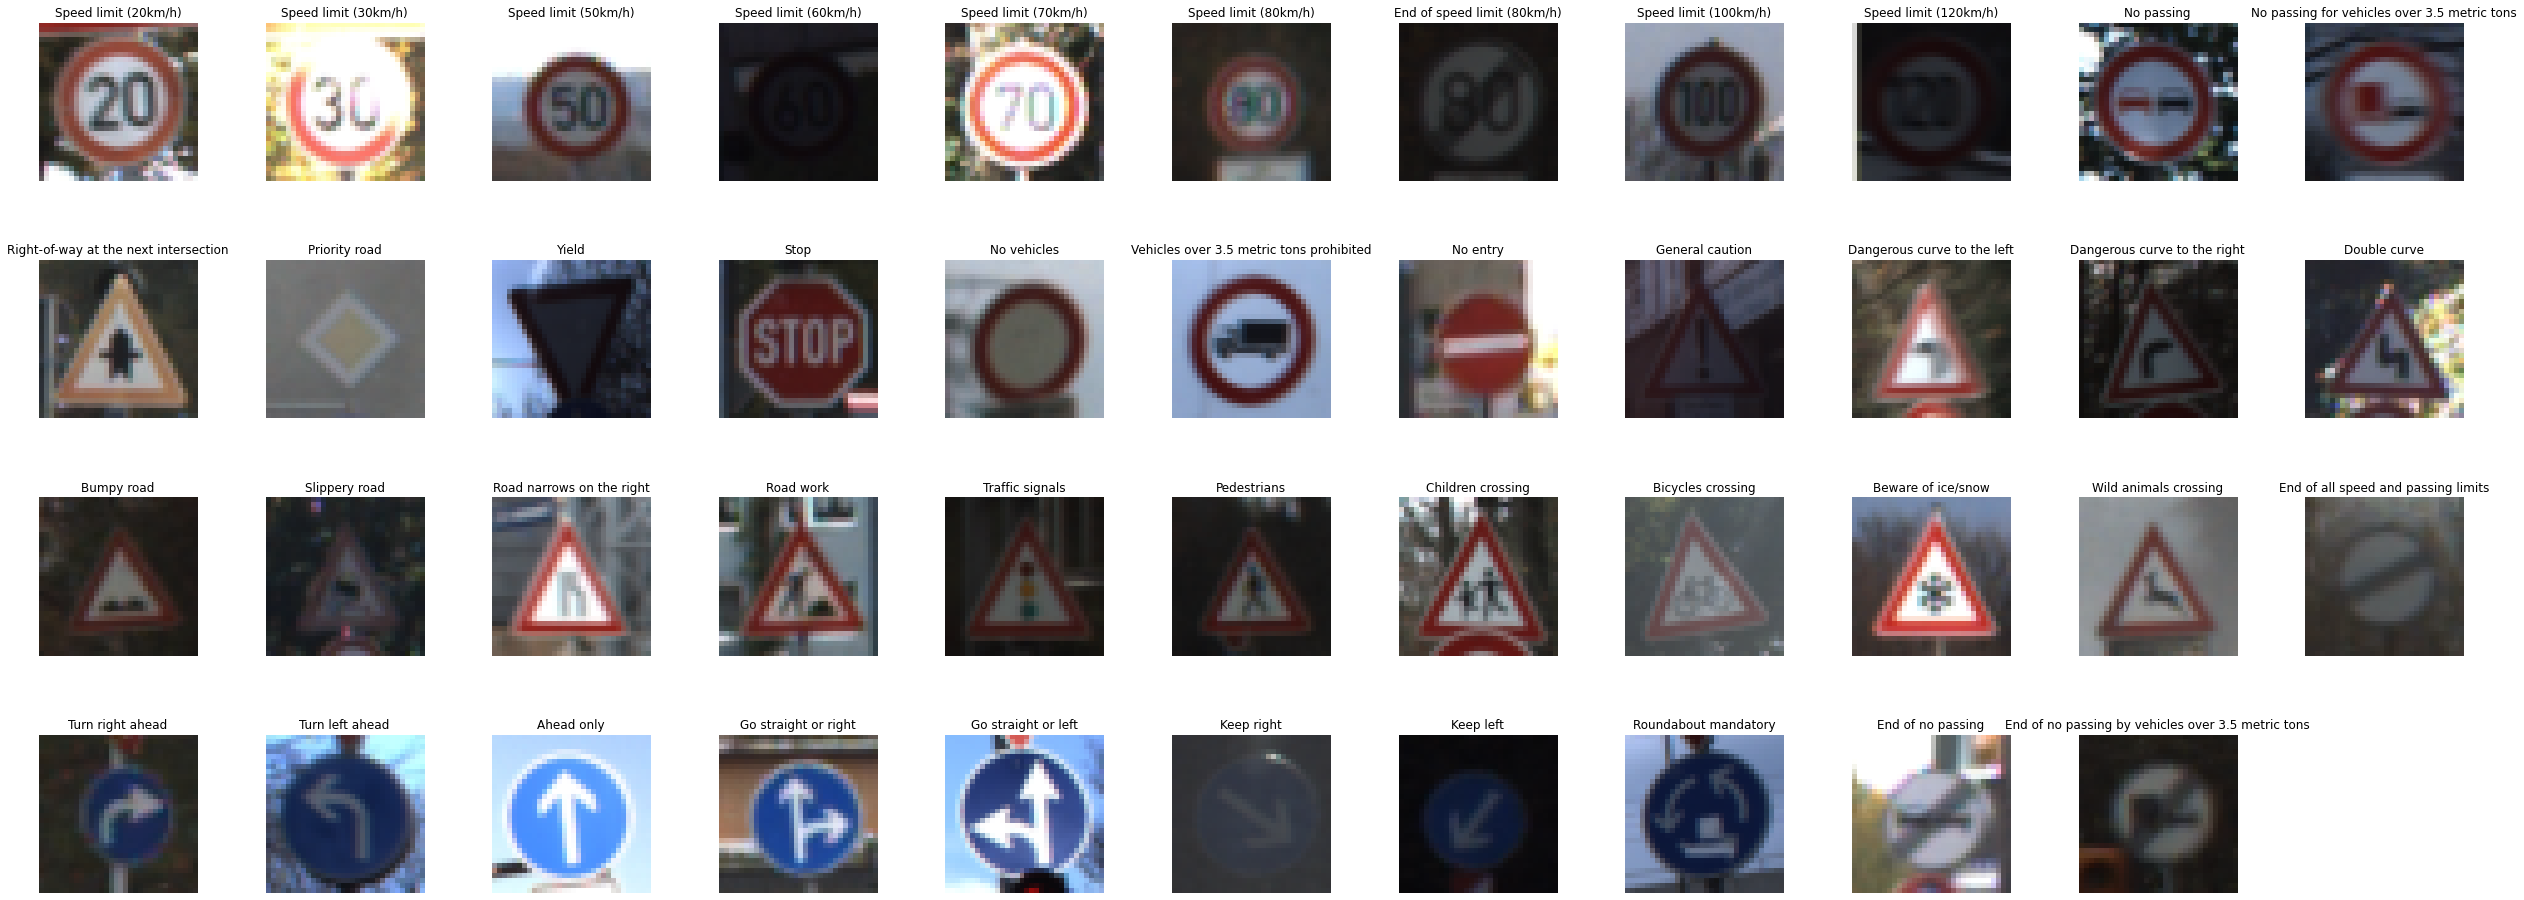

In [127]:
n_rows = 4
n_cols = 11
label = 0
plt.figure(figsize=(n_cols * 4, n_rows * 4))
for row in range(n_rows):
    for col in range(n_cols):
        index = int(np.mean(np.where(signimages['labels']==label)))
        num = n_cols * row + col
        plt.subplot(n_rows, n_cols, num + 1)
        plt.imshow(signimages['features'][index])
        plt.axis('off')
        plt.title(signnames[signimages['labels'][index]], fontsize=12)
        label += 1
        if label > 42:
          break
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [128]:
x_train = signimages['features']
y_train = signimages['labels']
print(x_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [129]:
keras.backend.clear_session()
np.random.seed(52637)
tf.random.set_seed(52637)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(43, activation="softmax")
])

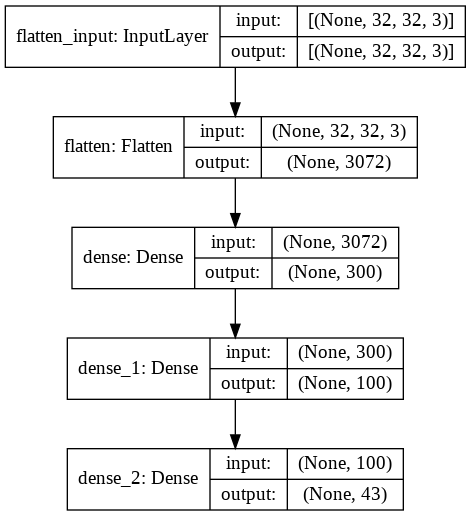

In [130]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [131]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [132]:
history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_train, y_train))

Epoch 1/30
1088/1088 [==============================] - 16s 14ms/step - loss: 8.1552 - accuracy: 0.0513 - val_loss: 3.5564 - val_accuracy: 0.0552
Epoch 2/30
1088/1088 [==============================] - 13s 12ms/step - loss: 3.5185 - accuracy: 0.0557 - val_loss: 3.4946 - val_accuracy: 0.0578
Epoch 3/30
1088/1088 [==============================] - 13s 12ms/step - loss: 3.4866 - accuracy: 0.0578 - val_loss: 3.4811 - val_accuracy: 0.0578
Epoch 4/30
1088/1088 [==============================] - 14s 12ms/step - loss: 3.4796 - accuracy: 0.0564 - val_loss: 3.4780 - val_accuracy: 0.0578
Epoch 5/30
1088/1088 [==============================] - 13s 12ms/step - loss: 3.4779 - accuracy: 0.0571 - val_loss: 3.4772 - val_accuracy: 0.0578
Epoch 6/30
1088/1088 [==============================] - 13s 12ms/step - loss: 3.4775 - accuracy: 0.0578 - val_loss: 3.4769 - val_accuracy: 0.0578
Epoch 7/30
1088/1088 [==============================] - 13s 12ms/step - loss: 3.4773 - accuracy: 0.0565 - val_loss: 3.4769 -

In [133]:
# x_train_grey = x_train/255
# # print(x_train_grey)
# # print(x_train_grey.shape)
# # import lodgepole.image_tools as lit
# # gray_img = lit.rgb2gray(x_train_grey)
# # print(x_train_grey.shape)
# # x_train_grey
# import cv2
# #x_train_grayscale = np.zeros(x_train_grey.shape[:-1])
# x_train_grayscale = np.dot(x_train_grey[...,:3], [0.1140, 0.5870, 0.2989])
# print(x_train_grayscale.shape)
# # x_train_grayscale = np.zeros(x_train.shape[:-1])
# # for i in range(0,len(x_train)-1): 
# #     x_train_grayscale[i] = cv2.cvtColor(x_train[i], cv2.COLOR_BGR2GRAY)
# # x_train_grayscale.shape
# inx = 20123
# plt.imshow(x_train_grayscale[inx])
# print("The image shows a {} sign".format(signnames[signimages['labels'][inx]]))

(34799, 32, 32, 3)
The image shows a Turn left ahead sign


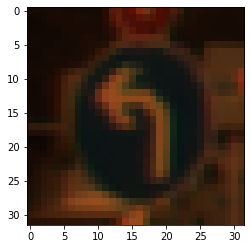

In [134]:
x_train_grey = (x_train / 255) * [0.5870, 0.2989, 0.1140]
# print(x_train_grey)
print(x_train_grey.shape)
inx = 20123
plt.imshow(x_train_grey[inx])
print("The image shows a {} sign".format(signnames[signimages['labels'][inx]]))

dict_keys(['coords', 'labels', 'features', 'sizes'])
(4410, 32, 32, 3)
(4410,)
(4410, 32, 32, 3)
The image shows a Vehicles over 3.5 metric tons prohibited sign


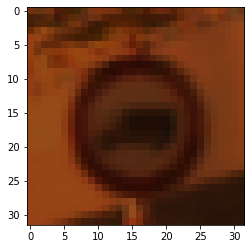

In [135]:
# Load images
signimages_val = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signimages_val = pickle.load(open(dataroot+"valid.p", "rb"))
print(signimages_val.keys())
x_valid = signimages_val['features']
y_valid = signimages_val['labels']
print(x_valid.shape)
print(y_valid.shape)
x_valid_grey = (x_valid / 255) * [0.5870, 0.2989, 0.1140]
# print(x_valid_grey)
print(x_valid_grey.shape)
inx = 726
plt.imshow(x_valid_grey[inx])
print("The image shows a {} sign".format(signnames[signimages_val['labels'][inx]]))

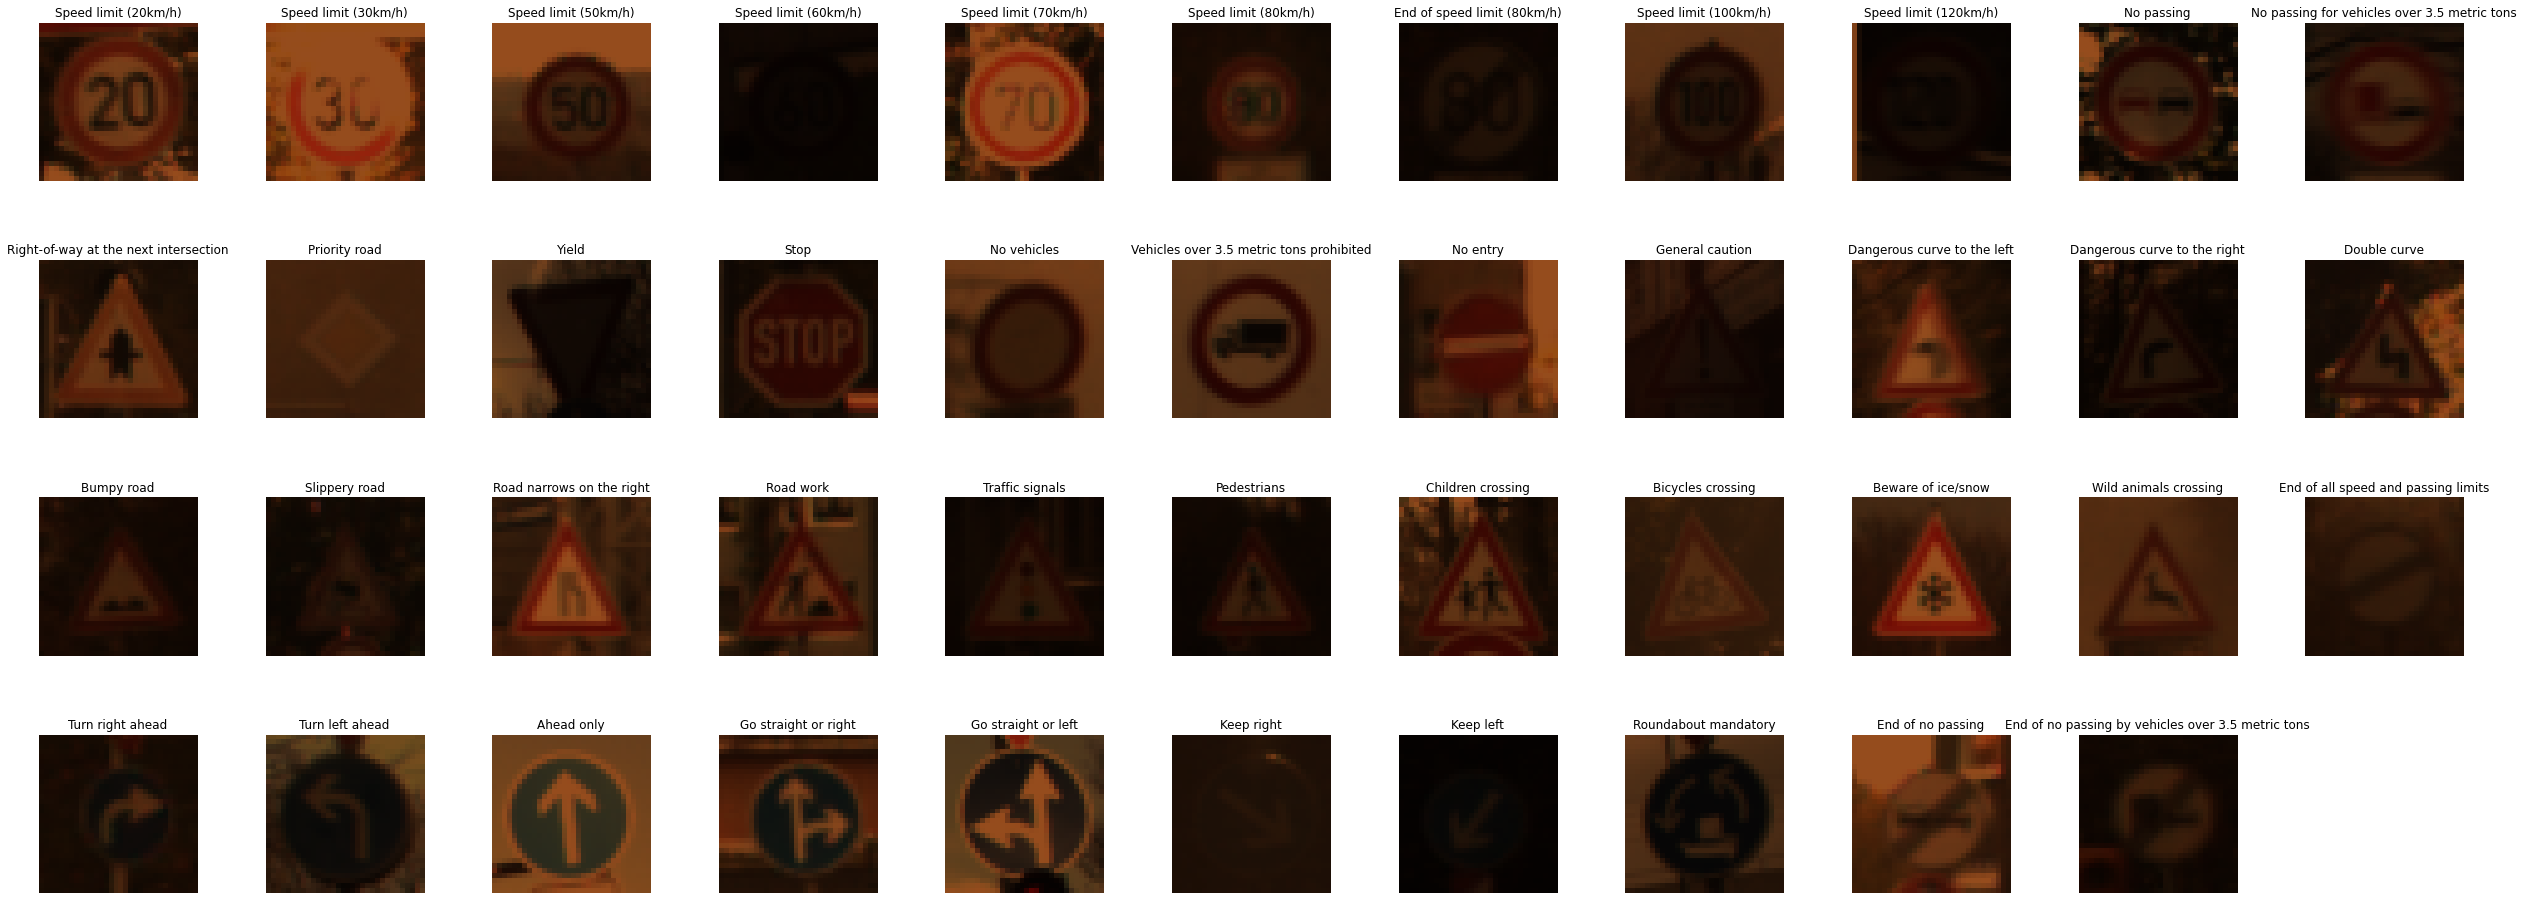

In [136]:
n_rows = 4
n_cols = 11
label = 0
plt.figure(figsize=(n_cols * 4, n_rows * 4))
for row in range(n_rows):
    for col in range(n_cols):
        index = int(np.mean(np.where(signimages['labels']==label)))
        num = n_cols * row + col
        plt.subplot(n_rows, n_cols, num + 1)
        plt.imshow(x_train_grey[index])
        plt.axis('off')
        plt.title(signnames[signimages['labels'][index]], fontsize=12)
        label += 1
        if label > 42:
          break
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [137]:
keras.backend.clear_session()
np.random.seed(52637)
tf.random.set_seed(52637)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(43, activation="softmax")
])

In [138]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [139]:
history = model.fit(x_train_grey, y_train, epochs=30, 
                    validation_data=(x_valid_grey, y_valid))

Epoch 1/30
1088/1088 [==============================] - 11s 10ms/step - loss: 1.9372 - accuracy: 0.4817 - val_loss: 1.2800 - val_accuracy: 0.6197
Epoch 2/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.8210 - accuracy: 0.7709 - val_loss: 1.0248 - val_accuracy: 0.6846
Epoch 3/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.5657 - accuracy: 0.8451 - val_loss: 0.8021 - val_accuracy: 0.7862
Epoch 4/30
1088/1088 [==============================] - 10s 10ms/step - loss: 0.4531 - accuracy: 0.8765 - val_loss: 0.7219 - val_accuracy: 0.8215
Epoch 5/30
1088/1088 [==============================] - 10s 10ms/step - loss: 0.3918 - accuracy: 0.8954 - val_loss: 0.6995 - val_accuracy: 0.8254
Epoch 6/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.3526 - accuracy: 0.9055 - val_loss: 0.9194 - val_accuracy: 0.7664
Epoch 7/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.3141 - accuracy: 0.9150 - val_loss: 0.7494 -

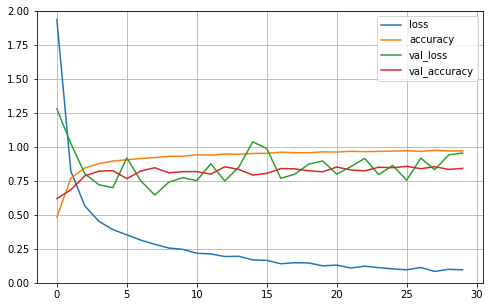

In [140]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [141]:
def build_model(optimizer='adam'):
    keras.backend.clear_session()
    np.random.seed(52637)
    tf.random.set_seed(52637)
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[32, 32, 3]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(43, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

keras_class = keras.wrappers.scikit_learn.KerasClassifier(build_model)

keras_class.fit(x_train_grey, y_train, epochs=30, 
               validation_data=(x_valid_grey, y_valid))

Epoch 1/30
1088/1088 [==============================] - 11s 10ms/step - loss: 1.9372 - accuracy: 0.4817 - val_loss: 1.2800 - val_accuracy: 0.6197
Epoch 2/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.8210 - accuracy: 0.7709 - val_loss: 1.0248 - val_accuracy: 0.6846
Epoch 3/30
1088/1088 [==============================] - 10s 10ms/step - loss: 0.5657 - accuracy: 0.8451 - val_loss: 0.8021 - val_accuracy: 0.7862
Epoch 4/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.4531 - accuracy: 0.8765 - val_loss: 0.7219 - val_accuracy: 0.8215
Epoch 5/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.3918 - accuracy: 0.8954 - val_loss: 0.6995 - val_accuracy: 0.8254
Epoch 6/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.3526 - accuracy: 0.9055 - val_loss: 0.9194 - val_accuracy: 0.7664
Epoch 7/30
1088/1088 [==============================] - 11s 10ms/step - loss: 0.3141 - accuracy: 0.9150 - val_loss: 0.7494 -

In [142]:
optimizers = ['sgd', 'adam', 'rmsprop', 'adadelta', 'adamax', 'nadam', 'adagrad', 'ftrl']
param_grid = dict(optimizer=optimizers)
grid = GridSearchCV(estimator=keras_class, param_grid=param_grid, cv=3)
grid_sign_class = grid.fit(x_train_grey, y_train)

1088/1088 [==============================] - 22s 20ms/step - loss: 1.8664 - accuracy: 0.4910


In [143]:
acc = grid_sign_class.cv_results_['mean_test_score']
params = grid_sign_class.cv_results_['params']
for acc, param in zip(acc, params):
    print("Accuracy:%f For: %r" % (acc, param))
print("The Best Accuracy Was %f Using %s" % (grid_sign_class.best_score_, grid_sign_class.best_params_))

Accuracy:0.081036 For: {'optimizer': 'sgd'}
Accuracy:0.210953 For: {'optimizer': 'adam'}
Accuracy:0.210234 For: {'optimizer': 'rmsprop'}
Accuracy:0.036006 For: {'optimizer': 'adadelta'}
Accuracy:0.195952 For: {'optimizer': 'adamax'}
Accuracy:0.261154 For: {'optimizer': 'nadam'}
Accuracy:0.040374 For: {'optimizer': 'adagrad'}
Accuracy:0.062069 For: {'optimizer': 'ftrl'}
The Best Accuracy Was 0.261154 Using {'optimizer': 'nadam'}


Epoch 1/30
1088/1088 [==============================] - 22s 20ms/step - loss: 1.8664 - accuracy: 0.4910 - val_loss: 1.2587 - val_accuracy: 0.6163
Epoch 2/30
1088/1088 [==============================] - 21s 19ms/step - loss: 0.7476 - accuracy: 0.7915 - val_loss: 0.8282 - val_accuracy: 0.7544
Epoch 3/30
1088/1088 [==============================] - 21s 19ms/step - loss: 0.4975 - accuracy: 0.8664 - val_loss: 0.8595 - val_accuracy: 0.7821
Epoch 4/30
1088/1088 [==============================] - 21s 19ms/step - loss: 0.3860 - accuracy: 0.8981 - val_loss: 0.8679 - val_accuracy: 0.7778
Epoch 5/30
1088/1088 [==============================] - 21s 19ms/step - loss: 0.3240 - accuracy: 0.9145 - val_loss: 0.8409 - val_accuracy: 0.7866
Epoch 6/30
1088/1088 [==============================] - 21s 19ms/step - loss: 0.2781 - accuracy: 0.9269 - val_loss: 0.7219 - val_accuracy: 0.8363
Epoch 7/30
1088/1088 [==============================] - 21s 19ms/step - loss: 0.2532 - accuracy: 0.9330 - val_loss: 0.7761 -

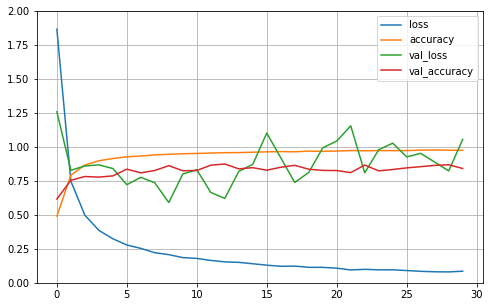

In [144]:
keras.backend.clear_session()
np.random.seed(52637)
tf.random.set_seed(52637)
best_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(43, activation="softmax")
])
best_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])
history = best_model.fit(x_train_grey, y_train, epochs=30, 
                    validation_data=(x_valid_grey, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

dict_keys(['sizes', 'coords', 'features', 'labels'])
(12630, 32, 32, 3)
(12630,)
(12630, 32, 32, 3)
The image shows a Speed limit (100km/h) sign


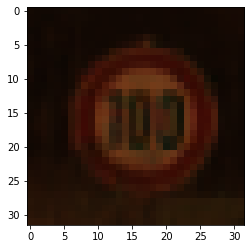

In [145]:
# Load images
signimages_test = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signimages_test = pickle.load(open(dataroot+"test.p", "rb"))
print(signimages_test.keys())
x_test = signimages_test['features']
y_test = signimages_test['labels']
print(x_test.shape)
print(y_test.shape)
x_test_grey = (x_test / 255) * [0.5870, 0.2989, 0.1140]
# print(x_valid_grey)
print(x_test_grey.shape)
inx = 6315
plt.imshow(x_test_grey[inx])
print("The image shows a {} sign".format(signnames[signimages_test['labels'][inx]]))

In [146]:
best_model.evaluate(x_test_grey, y_test)

395/395 [==============================] - 2s 4ms/step - loss: 1.5342 - accuracy: 0.8320


[1.5341804027557373, 0.8319873213768005]

In [147]:
y_pred = model.predict_classes(x_test_grey)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ...,  5,  7, 10])

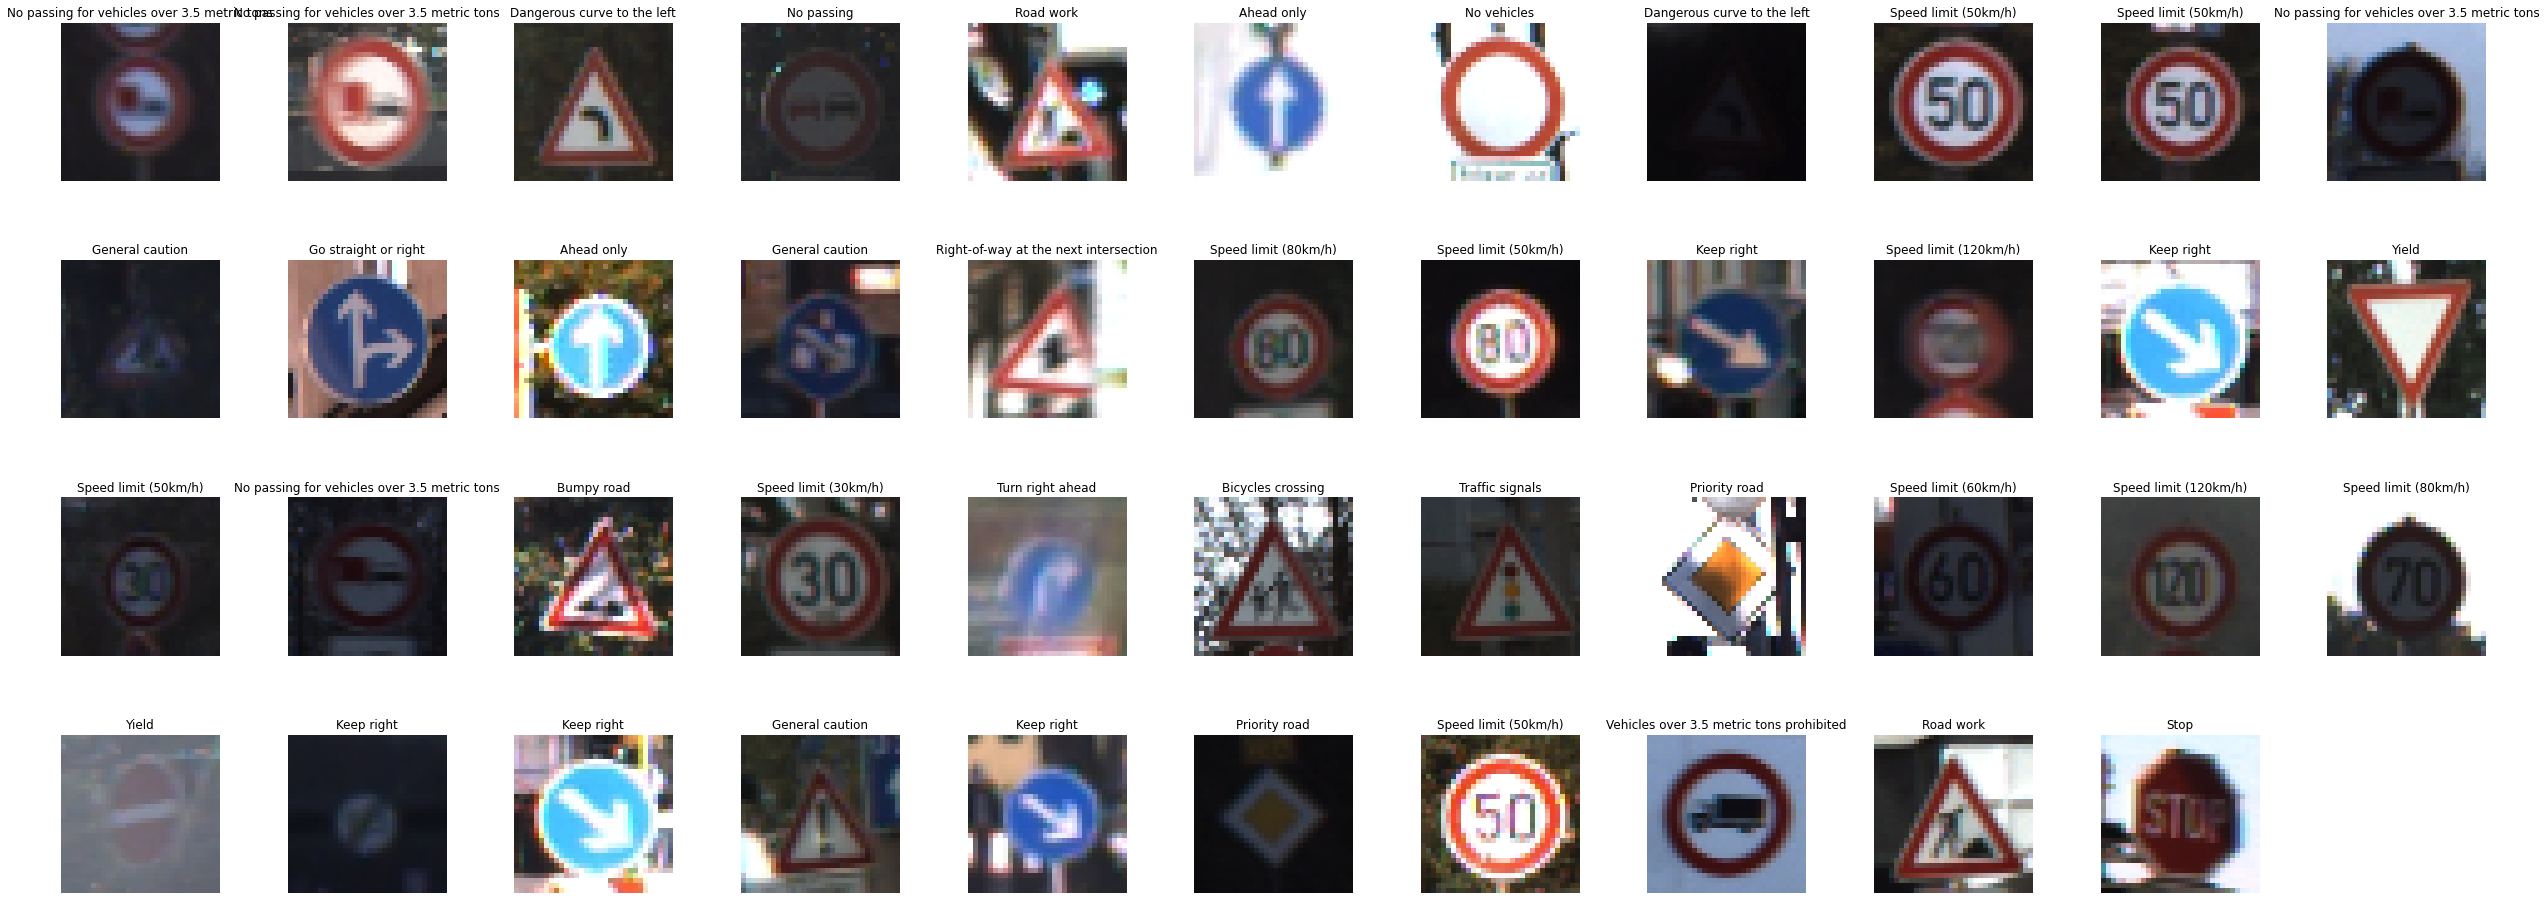

In [148]:
n_rows = 4
n_cols = 11
label = 0
plt.figure(figsize=(n_cols * 4, n_rows * 4))
for row in range(n_rows):
    for col in range(n_cols):
        index = int(np.mean(np.where(signimages_test['labels']==label)))
        num = n_cols * row + col
        plt.subplot(n_rows, n_cols, num + 1)
        plt.imshow(x_test_grey[index] / [0.5870, 0.2989, 0.1140])
        plt.axis('off')
        plt.title(signnames[y_pred[index]], fontsize=12)
        label += 1
        if label > 42:
          break
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [149]:
knClass = KNeighborsClassifier()
knClass.fit(x_train_grey.reshape(34799,3072), y_train)
print(knClass.score(x_valid_grey.reshape(4410,3072), y_valid))

0.30385487528344673
